In [6]:
##Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
##Part 1: Clean Data

##Load CSV and get rid of rows with duplicates and missing info
transactions = pd.read_csv('sample_transactions.csv')  
transactions = transactions.dropna() 
#print(transactions.info())
transactions = transactions.drop_duplicates() 

#Ensure valid dates, transaction values, and types for column entries
transactions = transactions[transactions['transaction_amount'] >= 0] 

transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], errors='coerce')
#if transactions['transaction_date'].notnull().all():
#    print("All dates are valid.")  --> all dates are valid
transactions = transactions[transactions['transaction_date'].dt.month <= 12] 
transactions = transactions[transactions['transaction_date'].dt.year <= 2023] 
transactions = transactions[transactions['transaction_date'].dt.day <= 31] 

#print(type(transactions["transaction_amount"][1])) #--> int64 
#print(type(transactions['customer_segment'][1]))   #--> str
#print(type(transactions['product_category'][1]))   #--> str
#print(type(transactions['customer_id'][1]))        #--> int64


##Calculating and finding outliers
#print(transactions["transaction_amount"].describe()) #--> median = 478, Q1 = 299.75, Q3 = 755.75
IQR = 755.75 - 299.75
upperFence = 755.75 + (1.5 * IQR)
lowerFence = 299.75 - (1.5 * IQR)
transaction_cost_mask = (transactions['transaction_amount'] >= lowerFence) & (transactions['transaction_amount'] <= upperFence)
transactions = transactions[transaction_cost_mask]

In [8]:
##Part 2: Process the data
cost_per_person = transactions.groupby('customer_id').sum()
transactions['total_per_person'] = transactions['customer_id'].map(cost_per_person['transaction_amount'])

avgCost_per_person = transactions.groupby('customer_id')['transaction_amount'].mean()
transactions['average_cost_per_person'] = transactions['customer_id'].map(avgCost_per_person)

transaction_count_per_person = transactions['customer_id'].value_counts()
transactions['transaction_count_per_person'] = transactions['customer_id'].map(transaction_count_per_person)

transactions['day_of_week'] = transactions['transaction_date'].dt.day_name()
transactions.head()

,customer_id,transaction_date,product_category,transaction_amount,customer_segment,total_per_person,average_cost_per_person,transaction_count_per_person,day_of_week
1,208,2023-01-07,Fashion,862,Returning,862,862.0,1,Saturday
2,274,2023-01-02,Sports,838,New,838,838.0,1,Monday
3,149,2023-01-07,Fashion,875,Returning,875,875.0,1,Saturday
5,233,2023-01-05,Electronics,191,New,191,191.0,1,Thursday
6,190,2023-01-06,Sports,628,Returning,628,628.0,1,Friday


<AxesSubplot:xlabel='day_of_week', ylabel='transaction_amount'>

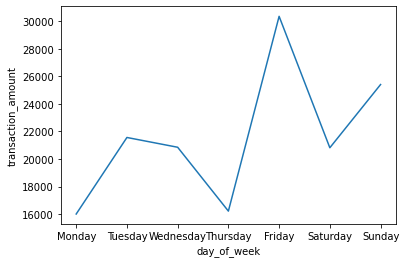

In [10]:
##Part 3: Analyze the data

##Lineplot of total transaction sales by the day of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transactions['day_of_week'] = pd.Categorical(transactions['day_of_week'], categories=weekday_order, ordered=True)
totalTransactions = transactions.groupby('day_of_week')['transaction_amount'].sum()
sns.lineplot(data=totalTransactions) 

<AxesSubplot:xlabel='customer_segment', ylabel='transaction_amount'>

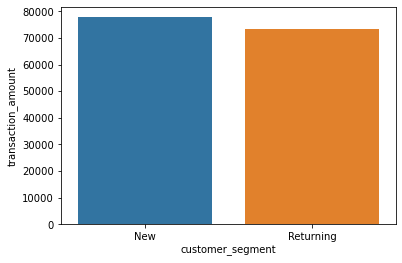

In [5]:
##Bar Chart of total sales by customer segment
segmentTransactionsDF = transactions.groupby('customer_segment')['transaction_amount'].sum().reset_index()
sns.barplot(data = segmentTransactionsDF, x = 'customer_segment', y = 'transaction_amount')

#NOTE: reset_index() allows me to make the indexs into columns of a dataframe which is exactly what needed 

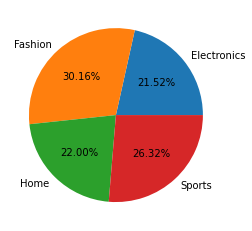

In [6]:
##Pie chart
salesByProduct = transactions.groupby('product_category')['transaction_amount'].sum()
plt.pie(salesByProduct, autopct='%1.2f%%', labels = salesByProduct.index)
plt.show()

In [7]:
##Table of top 10 customers
top_10 = transactions.copy()
top_10 = top_10.drop_duplicates(subset = ['customer_id'])
top_10 = top_10.sort_values(by = 'total_per_person', ascending = False)[0:10]
top_10

,customer_id,transaction_date,product_category,transaction_amount,customer_segment,total_per_person,average_cost_per_person,transaction_count_per_person,day_of_week
44,7,2023-01-14,Fashion,264,Returning,2752,688.000000,4,Saturday
23,108,2023-01-20,Home,965,New,2688,672.000000,4,Friday
27,70,2023-01-10,Fashion,706,New,2397,799.000000,3,Tuesday
56,258,2023-01-01,Fashion,991,New,2125,708.333333,3,Sunday
82,239,2023-01-19,Fashion,805,New,1999,666.333333,3,Thursday
94,42,2022-12-30,Home,993,Returning,1960,980.000000,2,Friday
111,191,2023-01-01,Fashion,382,New,1858,619.333333,3,Sunday
105,259,2022-12-30,Sports,886,Returning,1830,915.000000,2,Friday
121,283,2023-01-10,Electronics,907,New,1756,878.000000,2,Tuesday
28,203,2023-01-04,Home,833,Returning,1742,580.666667,3,Wednesday
